In [1]:

from IPython.display import display
import pandas as pd
import math
import numpy as np

import pydot
import graphviz

import tensorflow as tf

from tensorflow import feature_column
from tensorflow.keras import layers
from tensorflow import feature_column
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split


pd.set_option("display.max_columns", None)

In [2]:
df = pd.read_csv('./datasets/training.csv')
testing_data = pd.read_csv('./datasets/testing.csv')

# Need to restructure the dataset so all of the variables are properly encoded
encoding = {
    "Gender": {
        "M": 0,
        "F": 1
    },
    "Race": {
        "BLACK": 0,
        "WHITE": 1
    },
    "Age_at_Release": {
        "18-22": 0,
        "23-27": 1,
        "28-32": 2,
        "33-37": 3,
        "38-42": 4,
        "43-47": 5,
        "48 or older": 6
    },
    "Gang_Affiliated": {
        # None: 0,
        True: 1,
        False: 0
    },
    "Supervision_Level_First": {
        # None: 0,
        "Standard": 0,
        "High": 1,
        "Specialized": 2
    },
    "Supervision_Risk_Score_First": {
        # None: 5  # Average risk for non-scored
    },
    "Education_Level": {
        "Less than HS diploma": 0,
        "High School Diploma": 1,
        "At least some college": 2
    },
    "Dependents": {
        "0": 0,
        "1": 1,
        "2": 2,
        "3 or more": 3
    },
    "Prison_Offense": {
        # None: 4,
        "Violent/Sex": 0,
        "Violent/Non-Sex": 1,
        "Property": 2,
        "Drug": 3,
        "Other": 4
    },
    "Prison_Years": {
        "Less than 1 year": 0,
        "1-2 years": 1,
        "Greater than 2 to 3 years": 2,
        "More than 3 years": 3,
    },
    "Prior_Arrest_Episodes_Felony": {
        "0": 0,
        "1": 1,
        "2": 2,
        "3": 3,
        "4": 4,
        "5": 5,
        "6": 6,
        "7": 7,
        "8": 8,
        "9": 9,
        "10 or more": 10
    },
    "Prior_Arrest_Episodes_Misd": {
        "0": 0,
        "1": 1,
        "2": 2,
        "3": 3,
        "4": 4,
        "5": 5,
        "6 or more": 6
    },
    "Prior_Arrest_Episodes_Violent": {
        "0": 0,
        "1": 1,
        "2": 2,
        "3 or more": 3,
    },
    "Prior_Arrest_Episodes_Property": {
        "0": 0,
        "1": 1,
        "2": 2,
        "3": 3,
        "4": 4,
        "5 or more": 5,
    },
    "Prior_Arrest_Episodes_Drug": {
        "0": 0,
        "1": 1,
        "2": 2,
        "3": 3,
        "4": 4,
        "5 or more": 5,
    },
    "Prior_Arrest_Episodes_PPViolationCharges": {
        "0": 0,
        "1": 1,
        "2": 2,
        "3": 3,
        "4": 4,
        "5 or more": 5,
    },
    "Prior_Arrest_Episodes_DVCharges": {
        True: 1,
        False: 0
    },
    "Prior_Arrest_Episodes_GunCharges": {
        True: 1,
        False: 0
    },
    "Prior_Conviction_Episodes_Felony": {
        "0": 0,
        "1": 1,
        "2": 2,
        "3 or more": 3,
    },
    "Prior_Conviction_Episodes_Misd": {
        "0": 0,
        "1": 1,
        "2": 2,
        "3": 3,
        "4 or more": 4,
    },
    "Prior_Conviction_Episodes_Viol": {
        True: 1,
        False: 0
    },
    "Prior_Conviction_Episodes_Prop": {
        "0": 0,
        "1": 1,
        "2": 2,
        "3 or more": 3,
    },
    "Prior_Conviction_Episodes_Drug": {
        "0": 0,
        "1": 1,
        "2 or more": 2,
    },
    "Prior_Conviction_Episodes_PPViolationCharges": {
        True: 1,
        False: 0
    },
    "Prior_Conviction_Episodes_DomesticViolenceCharges": {
        True: 1,
        False: 0
    },
    "Prior_Conviction_Episodes_GunCharges": {
        True: 1,
        False: 0
    },
    "Prior_Revocations_Parole": {
        True: 1,
        False: 0
    },
    "Prior_Revocations_Probation": {
        True: 1,
        False: 0
    },
    "Condition_MH_SA": {
        True: 1,
        False: 0
    },
    "Condition_Cog_Ed": {
        True: 1,
        False: 0
    },
    "Condition_Other": {
        True: 1,
        False: 0
    },
    "Violations_ElectronicMonitoring": {
        True: 1,
        False: 0
    },
    "Violations_Instruction": {
        True: 1,
        False: 0
    },
    "Violations_FailToReport": {
        True: 1,
        False: 0
    },
    "Violations_MoveWithoutPermission": {
        True: 1,
        False: 0
    },
    "Delinquency_Reports": {
        "0": 0,
        "1": 1,
        "2": 2,
        "3": 3,
        "4 or more": 4,
    },
    "Program_Attendances": {
        "0": 0,
        "1": 1,
        "2": 2,
        "3": 3,
        "4": 4,
        "5": 5,
        "6": 6,
        "7": 7,
        "8": 8,
        "9": 9,
        "10 or more": 10,
    },
    "Program_UnexcusedAbsences": {
        "0": 0,
        "1": 1,
        "2": 2,
        "3 or more": 3,
    },
    "Residence_Changes": {
        "0": 0,
        "1": 1,
        "2": 2,
        "3 or more": 3,
    },
    "Employment_Exempt": {
        True: 1,
        False: 0
    }
}
df = df.replace(encoding)
df['target'] = np.where(df['Recidivism_Within_3years']==True, 1, 0)
df = df.dropna()
df = df[df["Gender"]==0]
df = df.drop(columns=["ID", "Recidivism_Within_3years", "Recidivism_Arrest_Year1", "Recidivism_Arrest_Year2", "Recidivism_Arrest_Year3"])
df.head()

,Gender,Race,Age_at_Release,Residence_PUMA,Gang_Affiliated,Supervision_Risk_Score_First,Supervision_Level_First,Education_Level,Dependents,Prison_Offense,Prison_Years,Prior_Arrest_Episodes_Felony,Prior_Arrest_Episodes_Misd,Prior_Arrest_Episodes_Violent,Prior_Arrest_Episodes_Property,Prior_Arrest_Episodes_Drug,Prior_Arrest_Episodes_PPViolationCharges,Prior_Arrest_Episodes_DVCharges,Prior_Arrest_Episodes_GunCharges,Prior_Conviction_Episodes_Felony,Prior_Conviction_Episodes_Misd,Prior_Conviction_Episodes_Viol,Prior_Conviction_Episodes_Prop,Prior_Conviction_Episodes_Drug,Prior_Conviction_Episodes_PPViolationCharges,Prior_Conviction_Episodes_DomesticViolenceCharges,Prior_Conviction_Episodes_GunCharges,Prior_Revocations_Parole,Prior_Revocations_Probation,Condition_MH_SA,Condition_Cog_Ed,Condition_Other,Violations_ElectronicMonitoring,Violations_Instruction,Violations_FailToReport,Violations_MoveWithoutPermission,Delinquency_Reports,Program_Attendances,Program_UnexcusedAbsences,Residence_Changes,Avg_Days_per_DrugTest,DrugTests_THC_Positive,DrugTests_Cocaine_Positive,DrugTests_Meth_Positive,DrugTests_Other_Positive,Percent_Days_Employed,Jobs_Per_Year,Employment_Exempt,target
0,0,0,5,16,0.0,3.0,0.0,2,3,3.0,3,6,6,1,3,3,4,0,0,3,3,0,2,2,0,0,0,0,0,1,1,0,0,0,0,0,0,6,0,2,612.000000,0.000000,0.0,0.000000,0.0,0.488562,0.447610,0,0
1,0,0,3,16,0.0,6.0,2.0,0,1,1.0,3,7,6,3,0,3,5,1,0,3,4,1,0,2,1,1,1,0,0,0,0,0,0,1,0,0,4,0,0,2,35.666667,0.000000,0.0,0.000000,0.0,0.425234,2.000000,0,1
2,0,0,6,24,0.0,7.0,1.0,2,3,3.0,1,6,6,3,2,2,5,1,0,3,2,1,1,2,0,1,0,0,0,1,1,0,0,1,0,1,4,6,0,0,93.666667,0.333333,0.0,0.166667,0.0,0.000000,0.000000,0,1
3,0,1,4,16,0.0,7.0,1.0,0,1,2.0,1,8,6,0,3,3,3,0,0,3,4,0,3,2,0,0,0,0,1,1,1,0,0,0,0,0,0,6,0,3,25.400000,0.000000,0.0,0.000000,0.0,1.000000,0.718996,0,0
4,0,1,3,16,0.0,4.0,2.0,0,3,1.0,1,4,4,3,2,1,3,1,0,1,0,1,0,1,0,0,0,0,0,1,1,1,0,0,0,0,0,7,0,0,23.117647,0.000000,0.0,0.058824,0.0,0.203562,0.929389,0,1


In [3]:
train, test = train_test_split(df, test_size=0.2)
train, val = train_test_split(train, test_size=0.2)
print(len(train), 'train examples')
print(len(val), 'validation examples')
print(len(test), 'test examples')

6296 train examples
1574 validation examples
1968 test examples


In [4]:
# A utility method to create a tf.data dataset from a Pandas Dataframe
def df_to_dataset(dataframe, shuffle=True, batch_size=32):
  dataframe = dataframe.copy()
  labels = dataframe.pop('target')
  ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))

  if shuffle:
      ds = ds.shuffle(buffer_size=len(dataframe))

  ds = ds.batch(batch_size)
  return ds

batch_size = 16 # A small batch sized is used for demonstration purposes
train_ds = df_to_dataset(train, batch_size=batch_size)
val_ds = df_to_dataset(val, shuffle=False, batch_size=batch_size)
test_ds = df_to_dataset(test, shuffle=False, batch_size=batch_size)

In [5]:
feature_columns = []

# numeric cols
for header in [
    "Race",
    "Age_at_Release",
    "Residence_PUMA",
    "Gang_Affiliated",
    "Supervision_Risk_Score_First",
    "Supervision_Level_First",
    "Education_Level",
    "Dependents",
    "Prison_Offense",
    "Prison_Years",

    "Prior_Arrest_Episodes_Felony",
    "Prior_Arrest_Episodes_Misd",
    "Prior_Arrest_Episodes_Violent",
    "Prior_Arrest_Episodes_Property",
    "Prior_Arrest_Episodes_Drug",
    "Prior_Arrest_Episodes_PPViolationCharges",
    "Prior_Arrest_Episodes_DVCharges",
    "Prior_Arrest_Episodes_GunCharges",

    "Prior_Conviction_Episodes_Felony",
    "Prior_Conviction_Episodes_Misd",
    "Prior_Conviction_Episodes_Viol",
    "Prior_Conviction_Episodes_Prop",
    "Prior_Conviction_Episodes_Drug",
    "Prior_Conviction_Episodes_PPViolationCharges",
    "Prior_Conviction_Episodes_DomesticViolenceCharges",
    "Prior_Conviction_Episodes_GunCharges",

    "Prior_Revocations_Parole",
    "Prior_Revocations_Probation",
    "Condition_MH_SA",
    "Condition_Cog_Ed",
    "Condition_Other",

    "Violations_ElectronicMonitoring",
    "Violations_Instruction",
    "Violations_FailToReport",
    "Violations_MoveWithoutPermission",

    "Delinquency_Reports",
    "Program_Attendances",
    "Program_UnexcusedAbsences",
    "Residence_Changes",
    "Avg_Days_per_DrugTest",

    "DrugTests_THC_Positive",
    "DrugTests_Cocaine_Positive",
    "DrugTests_Meth_Positive",
    "DrugTests_Other_Positive",

    "Percent_Days_Employed",
    "Jobs_Per_Year",
    "Employment_Exempt"
]:
    feature_columns.append(feature_column.numeric_column(header))

# Cross certain columns
feature_columns.append(
    feature_column.indicator_column (
        feature_column.crossed_column([
            "Prior_Arrest_Episodes_Felony",
            "Prior_Arrest_Episodes_Misd",
            "Prior_Arrest_Episodes_Violent",
            "Prior_Arrest_Episodes_Property",
            "Prior_Arrest_Episodes_Drug",
            "Prior_Arrest_Episodes_PPViolationCharges",
            "Prior_Arrest_Episodes_DVCharges",
            "Prior_Arrest_Episodes_GunCharges",
        ], hash_bucket_size=10)
    )
)

feature_columns.append(
    feature_column.indicator_column (
        feature_column.crossed_column([
            "Prior_Conviction_Episodes_Felony",
            "Prior_Conviction_Episodes_Misd",
            "Prior_Conviction_Episodes_Viol",
            "Prior_Conviction_Episodes_Prop",
            "Prior_Conviction_Episodes_Drug",
            "Prior_Conviction_Episodes_PPViolationCharges",
            "Prior_Conviction_Episodes_DomesticViolenceCharges",
            "Prior_Conviction_Episodes_GunCharges",
        ], hash_bucket_size=10)
    )
)

feature_columns.append(
    feature_column.indicator_column (
        feature_column.crossed_column([
            "Violations_ElectronicMonitoring",
            "Violations_Instruction",
            "Violations_FailToReport",
            "Violations_MoveWithoutPermission",
        ], hash_bucket_size=10)
    )
)

feature_columns.append(
    feature_column.indicator_column (
        feature_column.crossed_column([
            "DrugTests_THC_Positive",
            "DrugTests_Cocaine_Positive",
            "DrugTests_Meth_Positive",
            "DrugTests_Other_Positive",
        ], hash_bucket_size=10)
    )
)

In [6]:
feature_layer = tf.keras.layers.DenseFeatures(feature_columns)

model = tf.keras.Sequential([
    feature_layer,
    layers.BatchNormalization(),
    layers.Dense(64, activation='softmax'),
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='softsign'),
    layers.Dense(32, activation='softplus'),
    layers.Dropout(.1),
    layers.Dense(1, activation='sigmoid'),
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(train_ds,
          validation_data=val_ds,
          epochs=10)

Epoch 1/10
Consider rewriting this model with the Functional API.


/Users/hanson/Documents/Workspaces/nih_challenge/venv/lib/python3.9/site-packages/tensorflow/python/keras/backend.py:5016: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  warnings.warn(


Consider rewriting this model with the Functional API.
383/394 [============================>.] - ETA: 0s - loss: 0.6363 - accuracy: 0.6457   

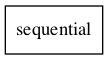

In [7]:
tf.keras.utils.plot_model(
    model,
    show_shapes=False,
    rankdir="LR",
    show_layer_names=True
)

In [8]:
loss, accuracy = model.evaluate(test_ds)
print("Accuracy", accuracy)

123/123 [==============================] - 0s 3ms/step - loss: 0.7286 - accuracy: 0.6773
Accuracy 0.6773374080657959


In [9]:
testing = pd.read_csv('./datasets/testing.csv')

encoding = {
    "Gender": {
        "M": 0,
        "F": 1
    },
    "Race": {
        "BLACK": 0,
        "WHITE": 1
    },
    "Age_at_Release": {
        "18-22": 0,
        "23-27": 1,
        "28-32": 2,
        "33-37": 3,
        "38-42": 4,
        "43-47": 5,
        "48 or older": 6
    },
    "Gang_Affiliated": {
        # None: 0,
        True: 1,
        False: 0
    },
    "Supervision_Level_First": {
        # None: 0,
        "Standard": 0,
        "High": 1,
        "Specialized": 2
    },
    "Supervision_Risk_Score_First": {
        # None: 5  # Average risk for non-scored
    },
    "Education_Level": {
        "Less than HS diploma": 0,
        "High School Diploma": 1,
        "At least some college": 2
    },
    "Dependents": {
        "0": 0,
        "1": 1,
        "2": 2,
        "3 or more": 3
    },
    "Prison_Offense": {
        # None: 4,
        "Violent/Sex": 0,
        "Violent/Non-Sex": 1,
        "Property": 2,
        "Drug": 3,
        "Other": 4
    },
    "Prison_Years": {
        "Less than 1 year": 0,
        "1-2 years": 1,
        "Greater than 2 to 3 years": 2,
        "More than 3 years": 3,
    },
    "Prior_Arrest_Episodes_Felony": {
        "0": 0,
        "1": 1,
        "2": 2,
        "3": 3,
        "4": 4,
        "5": 5,
        "6": 6,
        "7": 7,
        "8": 8,
        "9": 9,
        "10 or more": 10
    },
    "Prior_Arrest_Episodes_Misd": {
        "0": 0,
        "1": 1,
        "2": 2,
        "3": 3,
        "4": 4,
        "5": 5,
        "6 or more": 6
    },
    "Prior_Arrest_Episodes_Violent": {
        "0": 0,
        "1": 1,
        "2": 2,
        "3 or more": 3,
    },
    "Prior_Arrest_Episodes_Property": {
        "0": 0,
        "1": 1,
        "2": 2,
        "3": 3,
        "4": 4,
        "5 or more": 5,
    },
    "Prior_Arrest_Episodes_Drug": {
        "0": 0,
        "1": 1,
        "2": 2,
        "3": 3,
        "4": 4,
        "5 or more": 5,
    },
    "Prior_Arrest_Episodes_PPViolationCharges": {
        "0": 0,
        "1": 1,
        "2": 2,
        "3": 3,
        "4": 4,
        "5 or more": 5,
    },
    "Prior_Arrest_Episodes_DVCharges": {
        True: 1,
        False: 0
    },
    "Prior_Arrest_Episodes_GunCharges": {
        True: 1,
        False: 0
    },
    "Prior_Conviction_Episodes_Felony": {
        "0": 0,
        "1": 1,
        "2": 2,
        "3 or more": 3,
    },
    "Prior_Conviction_Episodes_Misd": {
        "0": 0,
        "1": 1,
        "2": 2,
        "3": 3,
        "4 or more": 4,
    },
    "Prior_Conviction_Episodes_Viol": {
        True: 1,
        False: 0
    },
    "Prior_Conviction_Episodes_Prop": {
        "0": 0,
        "1": 1,
        "2": 2,
        "3 or more": 3,
    },
    "Prior_Conviction_Episodes_Drug": {
        "0": 0,
        "1": 1,
        "2 or more": 2,
    },
    "Prior_Conviction_Episodes_PPViolationCharges": {
        True: 1,
        False: 0
    },
    "Prior_Conviction_Episodes_DomesticViolenceCharges": {
        True: 1,
        False: 0
    },
    "Prior_Conviction_Episodes_GunCharges": {
        True: 1,
        False: 0
    },
    "Prior_Revocations_Parole": {
        True: 1,
        False: 0
    },
    "Prior_Revocations_Probation": {
        True: 1,
        False: 0
    },
    "Condition_MH_SA": {
        True: 1,
        False: 0
    },
    "Condition_Cog_Ed": {
        True: 1,
        False: 0
    },
    "Condition_Other": {
        True: 1,
        False: 0
    },
    "Violations_ElectronicMonitoring": {
        True: 1,
        False: 0
    },
    "Violations_Instruction": {
        True: 1,
        False: 0
    },
    "Violations_FailToReport": {
        True: 1,
        False: 0
    },
    "Violations_MoveWithoutPermission": {
        True: 1,
        False: 0
    },
    "Delinquency_Reports": {
        "0": 0,
        "1": 1,
        "2": 2,
        "3": 3,
        "4 or more": 4,
    },
    "Program_Attendances": {
        "0": 0,
        "1": 1,
        "2": 2,
        "3": 3,
        "4": 4,
        "5": 5,
        "6": 6,
        "7": 7,
        "8": 8,
        "9": 9,
        "10 or more": 10,
    },
    "Program_UnexcusedAbsences": {
        "0": 0,
        "1": 1,
        "2": 2,
        "3 or more": 3,
    },
    "Residence_Changes": {
        "0": 0,
        "1": 1,
        "2": 2,
        "3 or more": 3,
    },
    "Employment_Exempt": {
        True: 1,
        False: 0
    }
}

testing = testing.replace(encoding)
testing = testing.fillna(0)

id_col = testing["ID"]
testing = testing.drop(columns=["ID"])

ds2 = tf.data.Dataset.from_tensor_slices(dict(testing))
ds2 = ds2.batch(32)

res = model.predict(ds2)

output = pd.DataFrame(res)
output["ID"] = id_col
print(output)

output.to_csv('results.csv')


Consider rewriting this model with the Functional API.
             0     ID
0     0.412397      6
1     0.186672      8
2     0.725607     15
3     0.347729     16
4     0.793919     23
...        ...    ...
4141  0.056700  26728
4142  0.121842  26732
4143  0.030508  26744
4144  0.023278  26746
4145  0.091009  26755

[4146 rows x 2 columns]
